In [1]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

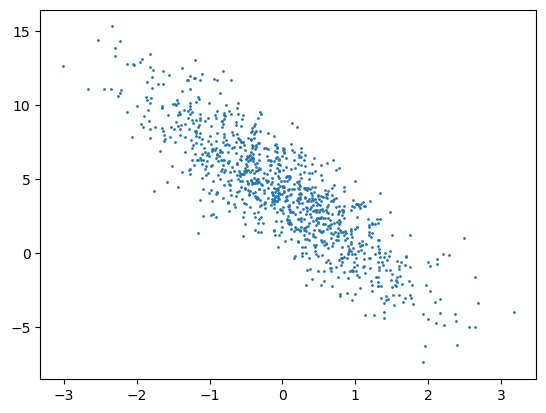

In [2]:
true_w=torch.tensor([2,-3.4])
true_b=torch.tensor(4.2)
features,labels=d2l.synthetic_data(true_w,true_b,1000)#随机数据集
d2l.plt.scatter(features[:,1],labels,1)

torch.Tensor

In [61]:
def load_array(data_arrays,batch_size,is_train=True):
    dataset=data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset=dataset,batch_size=batch_size,shuffle=is_train) 
    #自带函数shuffle是否打乱,迭代器类型


In [62]:
batch_size=10
data_iter=load_array((features,labels),batch_size,is_train=True)
for a,b in data_iter:
    print(a,b)
    break

tensor([[ 0.0981,  0.7037],
        [ 0.6552,  1.1954],
        [-0.0461,  0.6498],
        [-0.9006,  0.9882],
        [-0.3125,  0.4213],
        [ 1.9347,  0.7324],
        [ 1.6045,  2.1981],
        [-0.5703,  0.2207],
        [-1.2883, -0.3381],
        [-1.3087, -0.5315]]) tensor([[ 2.0053],
        [ 1.4241],
        [ 1.8909],
        [-0.9624],
        [ 2.1373],
        [ 5.5980],
        [-0.0754],
        [ 2.3234],
        [ 2.7769],
        [ 3.3848]])


In [5]:
from torch import nn
net=nn.Sequential(nn.Linear(2,1))
net[0].weight.data.normal_(0,0.01)
# net[0].bias.data.zero_()
net[0].bias.data.fill_(0)

# net.parameters()使w和b变为可训练参数

tensor([0.])

In [6]:
loss=nn.MSELoss()#l2-loss
optimizer=torch.optim.SGD(net.parameters(),lr=0.03)


In [7]:
num_epoch=10
for epoch in range(num_epoch):
    for X,y in data_iter:
        l=loss(net(X),y)
        optimizer.zero_grad()#清空梯度
        l.backward()
        optimizer.step()#更新参数
    l=loss(net(features),labels)
    print('Epoch %d, Loss: %.4f' % (epoch+1, l))

Epoch 1, Loss: 0.0005
Epoch 2, Loss: 0.0001
Epoch 3, Loss: 0.0001
Epoch 4, Loss: 0.0001
Epoch 5, Loss: 0.0001
Epoch 6, Loss: 0.0001
Epoch 7, Loss: 0.0001
Epoch 8, Loss: 0.0001
Epoch 9, Loss: 0.0001
Epoch 10, Loss: 0.0001


In [8]:
w=net[0].weight.data
b=net[0].bias.data
w,b

(tensor([[ 1.9990, -3.4007]]), tensor([4.1996]))

In [33]:
x=torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[16,17,18],[19,20,21],[22,23,24],[25,26,27],[28,29,30],[31,32,33]])
y=torch.tensor([1,2,3,4,5,6,7,8,9,10,11])
datas=data.TensorDataset(x,y)

datas= data.DataLoader(datas,batch_size=2,shuffle=True)
next(iter(datas))

[tensor([[ 4,  5,  6],
         [31, 32, 33]]),
 tensor([ 2, 11])]